In [6]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx


In [7]:
FD_pickle_dump_folder = r'C:\Users\shivam.vedant\PycharmProjects\energiapy\docs\notebooks\supply chain\AIChE 2024\FD Pickle Dump'

In [8]:
final_results_dict = dict()

In [9]:
select = [1, 10, 25, 50, 100, 150, 496]

for s in select:
    with open(fr"{FD_pickle_dump_folder}\{s}\FD_{s}_final_results.pkl", 'rb') as file:
        loaded_dict = pickle.load(file)
        if s not in final_results_dict:
            final_results_dict[s] = loaded_dict[s]
        
final_results_dict

{1: {'Expected Cost UI': 2395627.5,
  'Expected Cost FD': 2094372.0650889208,
  'Expected Resilience': 0.9897786417667139},
 10: {'Expected Cost UI': 2395628.257721872,
  'Expected Cost FD': 2094372.0650889208,
  'Expected Resilience': 0.9897786417667139},
 25: {'Expected Cost UI': 2395433.505368257,
  'Expected Cost FD': 2094372.0650889208,
  'Expected Resilience': 0.9897786417667139},
 50: {'Expected Cost UI': 2388142.198567796,
  'Expected Cost FD': 2094372.0650889208,
  'Expected Resilience': 0.9897786417667139},
 100: {'Expected Cost UI': 2362484.669396999,
  'Expected Cost FD': 2086848.2831211677,
  'Expected Resilience': 0.9901775738367331},
 150: {'Expected Cost UI': 2287709.295251497,
  'Expected Cost FD': 2061960.940749143,
  'Expected Resilience': 0.9925237006417899},
 496: {'Expected Cost UI': 2058463.3557439938,
  'Expected Cost FD': 2058463.3422047312,
  'Expected Resilience': 0.9926811262189826}}

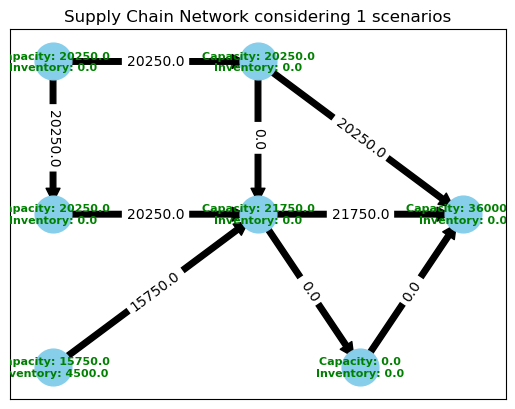

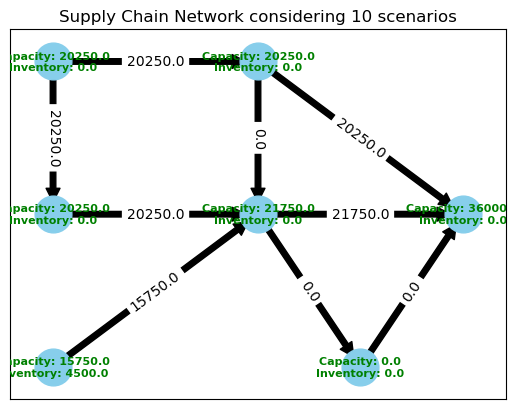

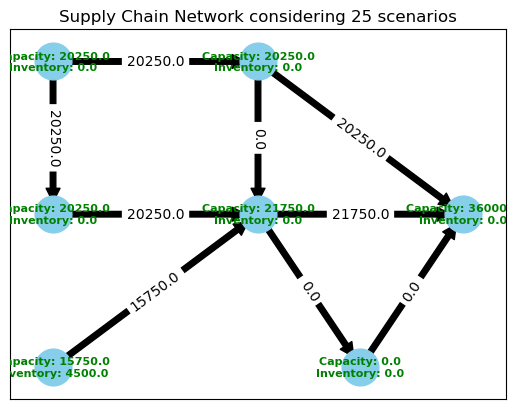

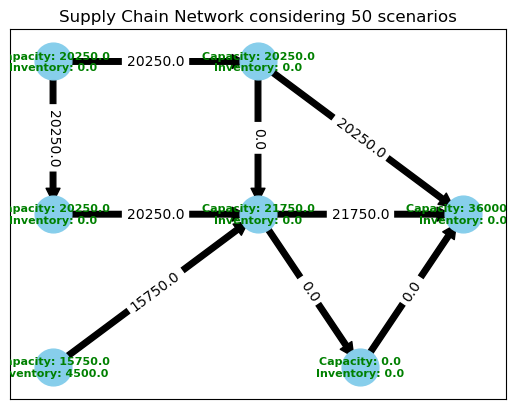

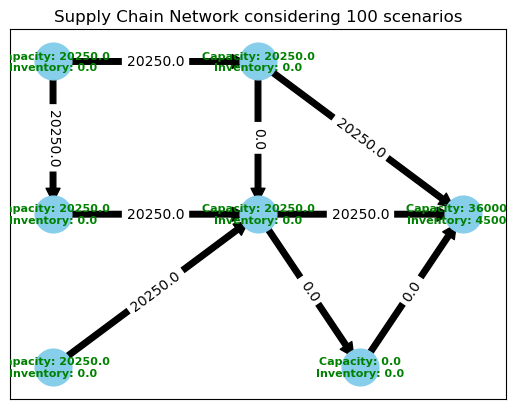

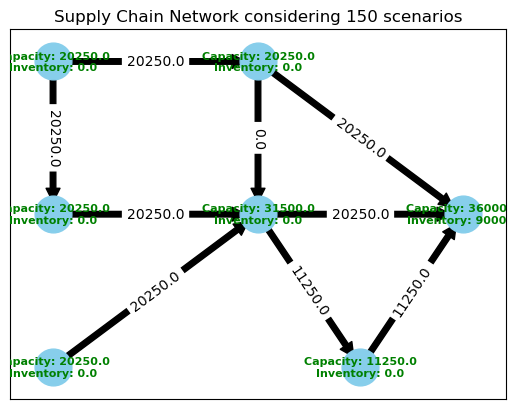

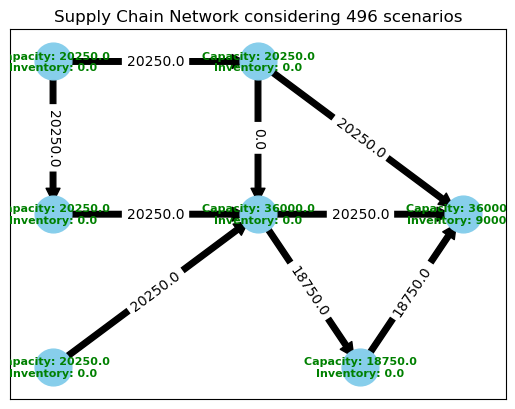

In [10]:
for s in select:
    G = nx.DiGraph()
    
    with open(fr"{FD_pickle_dump_folder}\{s}\ssoln_{s}_UI.pkl", 'rb') as file:
        ssoln_dict = pickle.load(file)
        
    nodes = {
    'Location 1': {
        'Capacity': ssoln_dict['Cap_P[loc1,com1_process,0]'] if 'Cap_P[loc1,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc1,com1_store_com1_in_stored,0]'] if 'Cap_S[loc1,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 2': {
        'Capacity': ssoln_dict['Cap_P[loc2,com1_process,0]'] if 'Cap_P[loc2,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc2,com1_store_com1_in_stored,0]'] if 'Cap_S[loc2,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 3': {
        'Capacity': ssoln_dict['Cap_P[loc3,com1_process,0]'] if 'Cap_P[loc3,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc3,com1_store_com1_in_stored,0]'] if 'Cap_S[loc3,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 4': {
        'Capacity': ssoln_dict['Cap_P[loc4,com1_process,0]'] if 'Cap_P[loc4,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc4,com1_store_com1_in_stored,0]'] if 'Cap_S[loc4,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 5': {
        'Capacity': ssoln_dict['Cap_P[loc5,com1_process,0]'] if 'Cap_P[loc5,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc5,com1_store_com1_in_stored,0]'] if 'Cap_S[loc5,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 6': {
        'Capacity': ssoln_dict['Cap_P[loc6,com1_process,0]'] if 'Cap_P[loc6,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc6,com1_store_com1_in_stored,0]'] if 'Cap_S[loc6,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 7': {
        'Capacity': ssoln_dict['Cap_P[loc7,com1_process,0]'] if 'Cap_P[loc7,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc7,com1_store_com1_in_stored,0]'] if 'Cap_S[loc7,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    }
    
    # Add nodes to the graph
    G.add_nodes_from(nodes.keys())
    
    # Define edges (connections between nodes)
    edges = [
        ('Location 1', 'Location 2', {'weight': ssoln_dict['Cap_F[loc1,loc2,truck12,0]'] if 'Cap_F[loc1,loc2,truck12,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 3', {'weight': ssoln_dict['Cap_F[loc1,loc3,truck13,0]'] if 'Cap_F[loc1,loc3,truck13,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 4', {'weight': ssoln_dict['Cap_F[loc2,loc4,truck24,0]'] if 'Cap_F[loc2,loc4,truck24,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 5', {'weight': ssoln_dict['Cap_F[loc2,loc5,truck25,0]'] if 'Cap_F[loc2,loc5,truck25,0]' in ssoln_dict.keys() else 0}),
        ('Location 3', 'Location 4', {'weight': ssoln_dict['Cap_F[loc3,loc4,truck34,0]'] if 'Cap_F[loc3,loc4,truck34,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 5', {'weight': ssoln_dict['Cap_F[loc4,loc5,truck45,0]'] if 'Cap_F[loc4,loc5,truck45,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 7', {'weight': ssoln_dict['Cap_F[loc4,loc7,truck47,0]'] if 'Cap_F[loc4,loc7,truck47,0]' in ssoln_dict.keys() else 0}),
        ('Location 6', 'Location 4', {'weight': ssoln_dict['Cap_F[loc6,loc4,truck64,0]'] if 'Cap_F[loc6,loc4,truck64,0]' in ssoln_dict.keys() else 0}),
        ('Location 7', 'Location 5', {'weight': ssoln_dict['Cap_F[loc7,loc5,truck75,0]'] if 'Cap_F[loc7,loc5,truck75,0]' in ssoln_dict.keys() else 0}),
    ]
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Define fixed positions for nodes
    fixed_positions = {
        'Location 1': (-2, 2),
        'Location 2': (0, 2),
        'Location 3': (-2, 0),
        'Location 4': (0, 0),
        'Location 5': (2, 0),
        'Location 6': (-2, -2),
        'Location 7': (1, -2)
    }
    
    # Create custom labels combining multiple pieces of information
    node_labels = {node: f"Capacity: {data['Capacity']}\nInventory: {data['Inventory']}" for node, data in nodes.items()}
    
    # Draw nodes and edges with fixed positions
    nx.draw_networkx_nodes(G, fixed_positions, node_color='skyblue', node_size=700)
    nx.draw_networkx_edges(G, fixed_positions, edgelist=edges, arrowstyle='simple', arrowsize=20)
    nx.draw_networkx_labels(G, fixed_positions, labels=node_labels, font_size=8, font_color='green', font_weight='bold')
    
    # Draw edge labels (optional)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, fixed_positions, edge_labels=edge_labels)
    
    # Show the plot
    plt.title(f"Supply Chain Network considering {s} scenarios")
    plt.show()